# 파일 전처리

* 디지털 리터러시(Digital Literacy)를 점수화하기 위해 모든 응답에 점수를 부여하여 Total Score 집계

* 설문 문항에 따라 '않다', '없다' 의 질문의 경우 reverse score을 부여하여 Total Score 집계


In [ ]:
import pandas as pd
import numpy as np

# 파일 로드
file_design = pd.ExcelFile('/content/7. 고령층_파일설계서.xlsx')
raw_data = pd.read_csv('/content/7 고령층_raw data_f.csv')

# 공백 항목을 np.nan으로 변환
raw_data = raw_data.replace(r'^\s*$', np.nan, regex=True)

# np.nan을 명확히 0으로 변환
raw_data = raw_data.fillna(0).astype(int)

# 시트 로드
sheet1 = file_design.parse(sheet_name=0)
sheet2 = file_design.parse(sheet_name=1)

# 리버스 질문 식별
reverse_questions = sheet1[sheet1.columns[-1]].astype(str).str.contains('\*', na=False)
reverse_columns = sheet1.loc[reverse_questions, sheet1.columns[0]].tolist()

# 점수 계산 함수 정의
def calculate_scores(row, reverse_cols):
    total_score = 0
    for col in row.index:
        if col == 'ID':
            continue  # ID 열은 건너뜀
        if pd.isna(row[col]) or not str(row[col]).isdigit():
            continue  # 결측값 또는 숫자가 아닌 값을 건너뜀
        value = int(row[col])
        if col in reverse_cols:
            total_score += 6 - value  # 리버스 점수 계산
        else:
            total_score += value
    return total_score

# 점수 계산 적용
raw_data['Total_Score'] = raw_data.apply(calculate_scores, axis=1, reverse_cols=reverse_columns)

# 결과 데이터 일부 표시
print(raw_data.head())

# 결과를 CSV 파일로 저장
raw_data.to_csv('/content/Calculated_Scores.csv', index=False)


       ID  TYP  Q1A1  Q1A2  Q2A11  Q2A12  Q2A13  Q2A2  Q2A3  Q3  ...  Q29A12  \
0  106669    7     1     1      1      0      0     2     2   1  ...       1   
1  114306    7     1     1      1      0      0     1     1   1  ...       5   
2  101979    7     1     1      1      0      0     2     1   1  ...       2   
3  111016    7     1     1      1      0      0     2     2   1  ...       5   
4  114317    7     1     1      1      0      0     2     2   1  ...       5   

   Q30A1  Q30A2  Q30A3  Q30A4  Q30A5  Q30A6  Q30A7  WT_T  Total_Score  
0      3      3      3      3      3      3      3     0          269  
1      5      4      2      2      2      2      2     0          347  
2      2      2      2      1      1      1      1     0          296  
3      4      5      3      4      4      3      2     0          358  
4      4      4      4      3      3      3      3     0          364  

[5 rows x 154 columns]


In [ ]:
raw_data.describe()

,ID,TYP,Q1A1,Q1A2,Q2A2,Q2A3,Q3,Q4A1,Q4A2,Q4A3,...,ADQ6,ADQ7,ADQ8,ADQ8A8,ADQ9,ADQ101,ADQ102,ADQ103,WT_T,Total_Score
count,2300.000000,2300.0,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.0,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,105584.219565,7.0,1.604783,1.770435,1.897826,1.930000,1.006087,1.765217,1.802609,1.699130,...,1.396522,1.841739,1.833478,0.0,3.931739,8.481739,1.147391,1.273043,1.000000,518.002174
std,3734.835153,0.0,0.489004,0.420645,0.302943,0.255203,0.077798,0.831946,0.873062,0.815199,...,0.489281,0.733939,0.372629,0.0,2.013686,5.081597,0.354573,0.445620,0.436866,98.759533
min,100010.000000,7.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.182323,277.000000
25%,102228.750000,7.0,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,0.0,2.000000,4.000000,1.000000,1.000000,0.729291,454.000000
50%,105373.500000,7.0,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,0.0,4.000000,9.000000,1.000000,1.000000,0.844086,523.000000
75%,108560.250000,7.0,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,0.0,5.000000,13.000000,1.000000,2.000000,1.021007,585.250000
max,115272.000000,7.0,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,...,2.000000,4.000000,2.000000,0.0,11.000000,17.000000,2.000000,2.000000,1.949839,875.000000


# 파일 전처리

Total score(디지털 리터러시) 분포 시각화


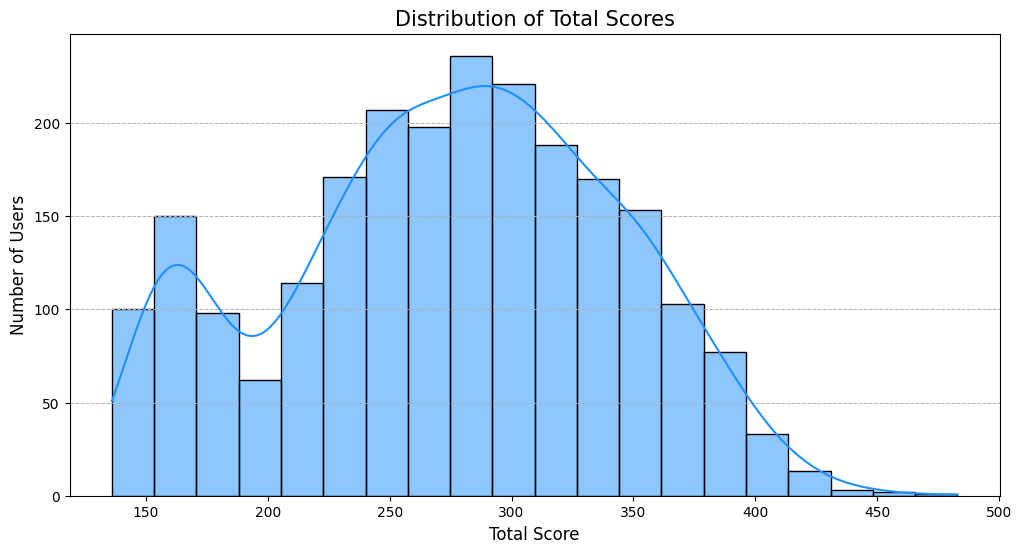

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 로드
calculated_scores = pd.read_csv('/content/drive/MyDrive/SKT/Week 1/Calculated_Scores (1).csv')

# Total_Score를 기준으로 사용자별 점수 시각화
plt.figure(figsize=(12, 6))
sns.histplot(calculated_scores['Total_Score'], bins=20, kde=True, color='dodgerblue', edgecolor='black')
plt.title('Distribution of Total Scores', fontsize=15)
plt.xlabel('Total Score', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# 그래프 표시
plt.show()


##분석 결과
300점 이하의 점수를 가진 사람의 분포가 많음

# 파일 전처리
위의 고령층의 디지털 리터러시와 일반 국민의 디지털 리터러시를 비교 분석하기 위해
1번의 일반국민 data를 활용



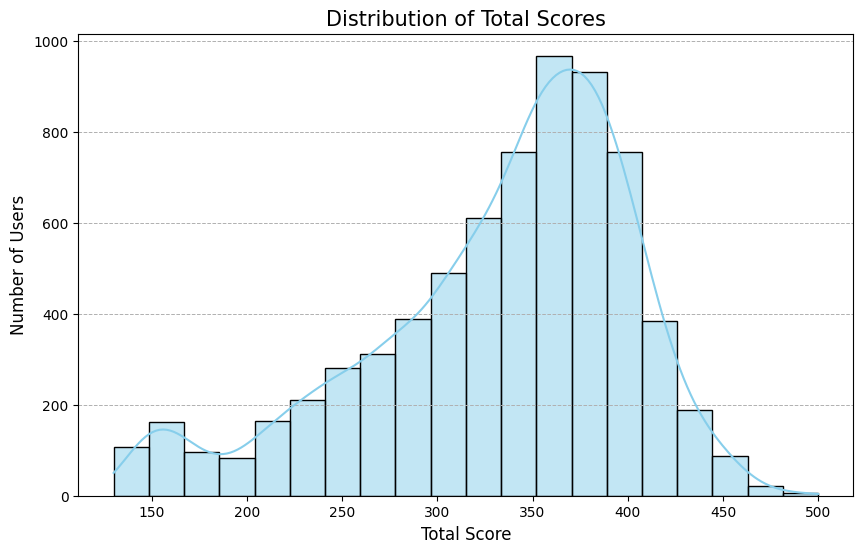

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 로드
file_design = pd.ExcelFile('/content/drive/MyDrive/SKT/Week 1/7. 고령층_파일설계서.xlsx')
new_raw_data = pd.read_csv('/content/drive/MyDrive/SKT/Week 1/1 일반국민_raw data.csv')

# 공백 항목을 0으로 처리
new_raw_data = new_raw_data.replace(r'^\s*$', 0, regex=True)

# 시트 로드
sheet1 = file_design.parse(sheet_name=0)
sheet2 = file_design.parse(sheet_name=1)

# 리버스 질문 식별
reverse_questions = sheet1[sheet1.columns[-1]].astype(str).str.contains('\*', na=False)
reverse_columns = sheet1.loc[reverse_questions, sheet1.columns[0]].tolist()

# 점수 계산 함수 정의
def calculate_scores(row, reverse_cols):
    total_score = 0
    for col in row.index:
        if col == 'ID':
            continue  # ID 열은 건너뜀
        if pd.isna(row[col]) or not str(row[col]).isdigit():
            continue  # 결측값 또는 숫자가 아닌 값을 건너뜀
        value = int(row[col])
        if col in reverse_cols:
            total_score += 6 - value  # 리버스 점수 계산
        else:
            total_score += value
    return total_score

# 점수 계산 적용
new_raw_data['Total_Score'] = new_raw_data.apply(calculate_scores, axis=1, reverse_cols=reverse_columns)

# 결과를 CSV 파일로 저장
new_raw_data.to_csv('/content/Calculated_Scores_New.csv', index=False)

# Total_Score를 기준으로 사용자별 점수 시각화
plt.figure(figsize=(10, 6))
sns.histplot(new_raw_data['Total_Score'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Scores', fontsize=15)
plt.xlabel('Total Score', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# 그래프 표시
plt.show()


## 분석결과

일반 국민을 대상으로 350점 이상을 가진 사람의 분포가 많음

위의 분포와 비교했을 때, 고령층의 디지털 리터러시가 떨어지는 것을 확인

# 데이터 분석
지역별 Total score 분포

* ADQ101 : 자료분류 질문(고령층)_현재 거주지역

* Total_Sum : 지역별 디지털 리터러시 점수

* Count : 지역별 응답자 수

In [ ]:
# 데이터를 ADQ101 기준으로 묶어서 합계와 갯수 계산
grouped_df = region_score.groupby('ADQ101').agg(
    Total_Sum=('Total_Score', 'sum'),
    Count=('Total_Score', 'size')
).reset_index()

grouped_df

,ADQ101,Total_Sum,Count
0,1,72089,255
1,2,45054,163
2,3,36998,133
3,4,43012,144
4,5,28045,98
5,6,28709,98
6,7,25245,88
7,8,12441,42
8,9,85252,297
9,10,30374,115


In [ ]:
# 파일을 불러와서 데이터프레임으로 변환
region_mapping = {
    1: '서울', 2: '부산', 3: '대구', 4: '인천', 5: '광주', 6: '대전', 7: '울산',
    8: '세종', 9: '경기', 10: '강원', 11: '충북', 12: '충남', 13: '전북',
    14: '전남', 15: '경북', 16: '경남', 17: '제주', 99: '무응답'
}

# ADQ3 값을 지역명으로 변환
grouped_df['Region'] = grouped_df['ADQ101'].map(region_mapping)


grouped_df

,ADQ101,Total_Sum,Count,Region
0,1,72089,255,서울
1,2,45054,163,부산
2,3,36998,133,대구
3,4,43012,144,인천
4,5,28045,98,광주
5,6,28709,98,대전
6,7,25245,88,울산
7,8,12441,42,세종
8,9,85252,297,경기
9,10,30374,115,강원


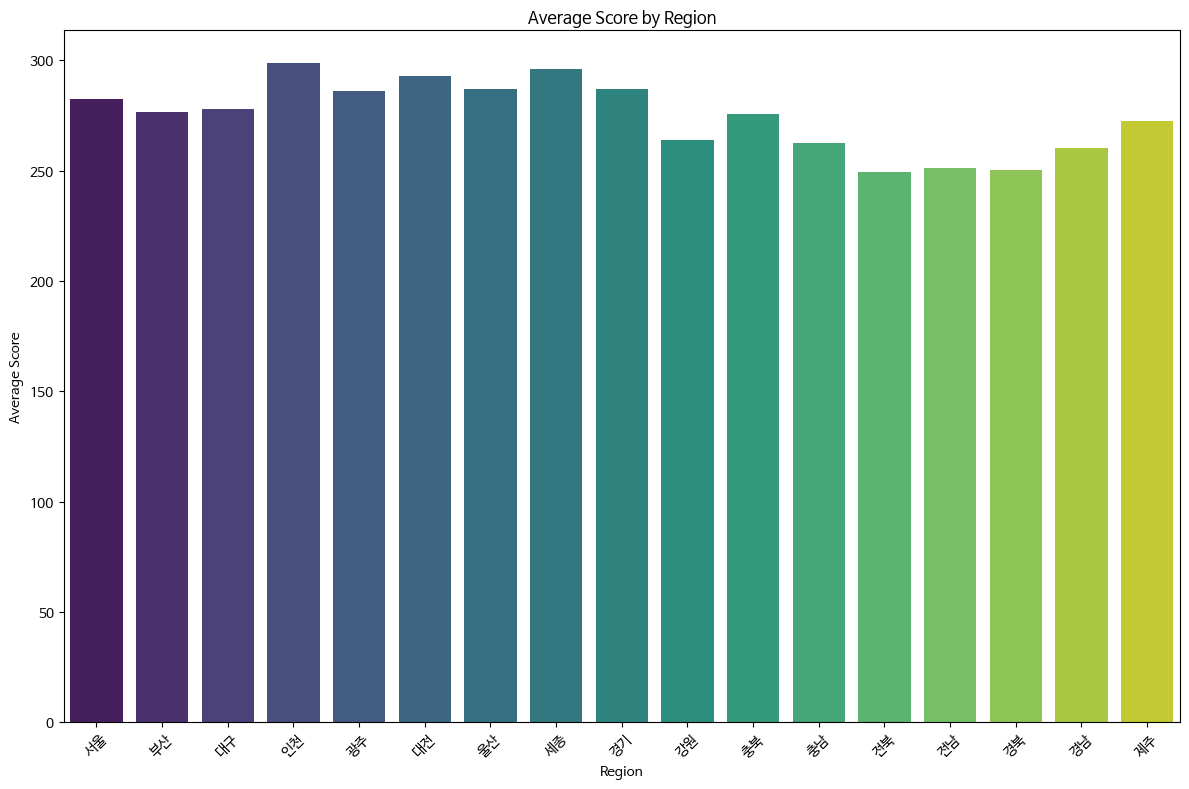

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Average_Score', data=grouped_df, palette='viridis')
plt.title('Average Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 분석결과
지역별 Total_score의 평균을 시각화한 결과

지역별로 디지털 리터러시 평균이 큰 차이를 보이지 않음

지역은 디지털 리터러시에 영향을 크게 미치지 않음

# 데이터 분석
인공지능을 사용하지 않는 이유 별 점수 분포

Q23 : 인공지능을 사용하지 않는 이유

'Q23A1' : 가격/요금이 비싸서

'Q23A2' : 아직 AI에 대해 잘 몰라서

'Q23A3' : 이용할 기기/제품이 없어서

'Q23A4' : 이용할 필요성이 없어서

'Q23A5' : 이용방법이 어려워서

'Q23A6' : 기술에 대한 거부감이 없어서

'Q23A7' : 신체적 제약으로 이용이 어려워서

'Q23A8' : 기타



In [ ]:
# 대상 컬럼 리스트
columns = ['Q23A1', 'Q23A2', 'Q23A3', 'Q23A4', 'Q23A5', 'Q23A6', 'Q23A7', 'Q23A8']

# 각 컬럼에 대해 값의 갯수를 세는 새로운 컬럼 추가
for col in columns:
    data[f'{col}_count'] = data[col].apply(lambda x: 1 if pd.notna(x) and x != " " else 0)

# 각 사용자마다 값이 몇 개인지 세기 위해 새로운 컬럼 추가
data['total_count'] = data[[f'{col}_count' for col in columns]].sum(axis=1)


In [ ]:
data

,ID,TYP,Q1A1,Q1A2,Q2A11,Q2A12,Q2A13,Q2A2,Q2A3,Q3,...,WT_T,Q23A1_count,Q23A2_count,Q23A3_count,Q23A4_count,Q23A5_count,Q23A6_count,Q23A7_count,Q23A8_count,total_count
0,106669,7,1,1,1,,,2,2,1,...,0.260461,0,0,0,0,0,0,0,0,0
1,114306,7,1,1,1,,,1,1,1,...,0.227903,0,0,0,0,0,0,0,0,0
2,101979,7,1,1,1,,,2,1,1,...,0.227903,0,0,0,0,0,0,0,0,0
3,111016,7,1,1,1,,,2,2,1,...,0.182323,0,0,0,0,0,0,0,0,0
4,114317,7,1,1,1,,,2,2,1,...,0.182323,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,109672,7,2,2,1,,,2,2,1,...,1.948350,0,1,0,1,1,1,0,0,4
2296,107098,7,2,2,1,,,2,2,1,...,1.948350,0,1,0,0,0,0,0,0,1
2297,107096,7,2,2,1,,,2,2,1,...,1.948350,0,1,0,0,0,0,0,0,1
2298,107867,7,2,2,1,,,2,2,1,...,1.948350,0,1,0,1,0,1,0,0,3


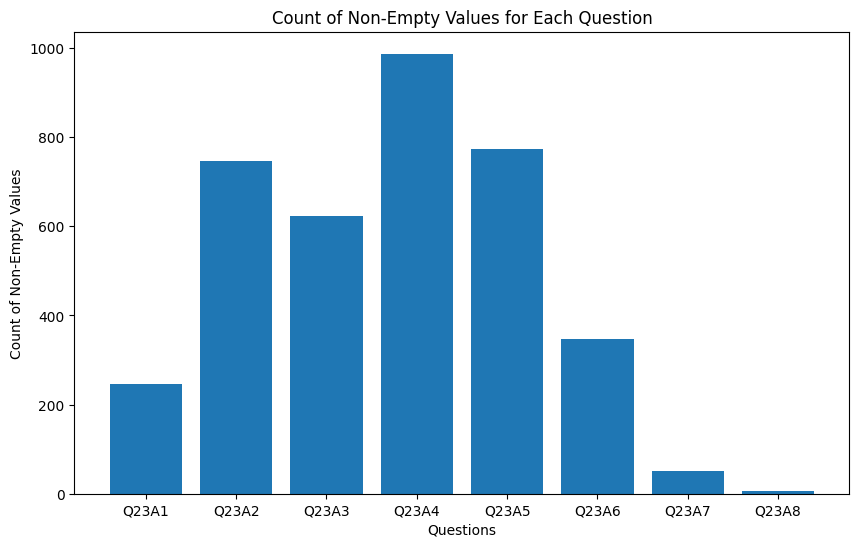

In [ ]:
# 각 컬럼의 count 합계 계산
counts = [data[f'{col}_count'].sum() for col in columns]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(columns, counts)
plt.xlabel('Questions')
plt.ylabel('Count of Non-Empty Values')
plt.title('Count of Non-Empty Values for Each Question')
plt.show()

## 분석결과
Q23A4 : 이용할 필요성이 없어서

Q23A5 : 이용방법이 어려워서

Q23A2 : 아직 인공지능에 대해 몰라서

순서로 응답이 많음

* 이용방법이 어렵거나 인공지능에 대해 몰라서 이용하지 못하는 문제가 존재

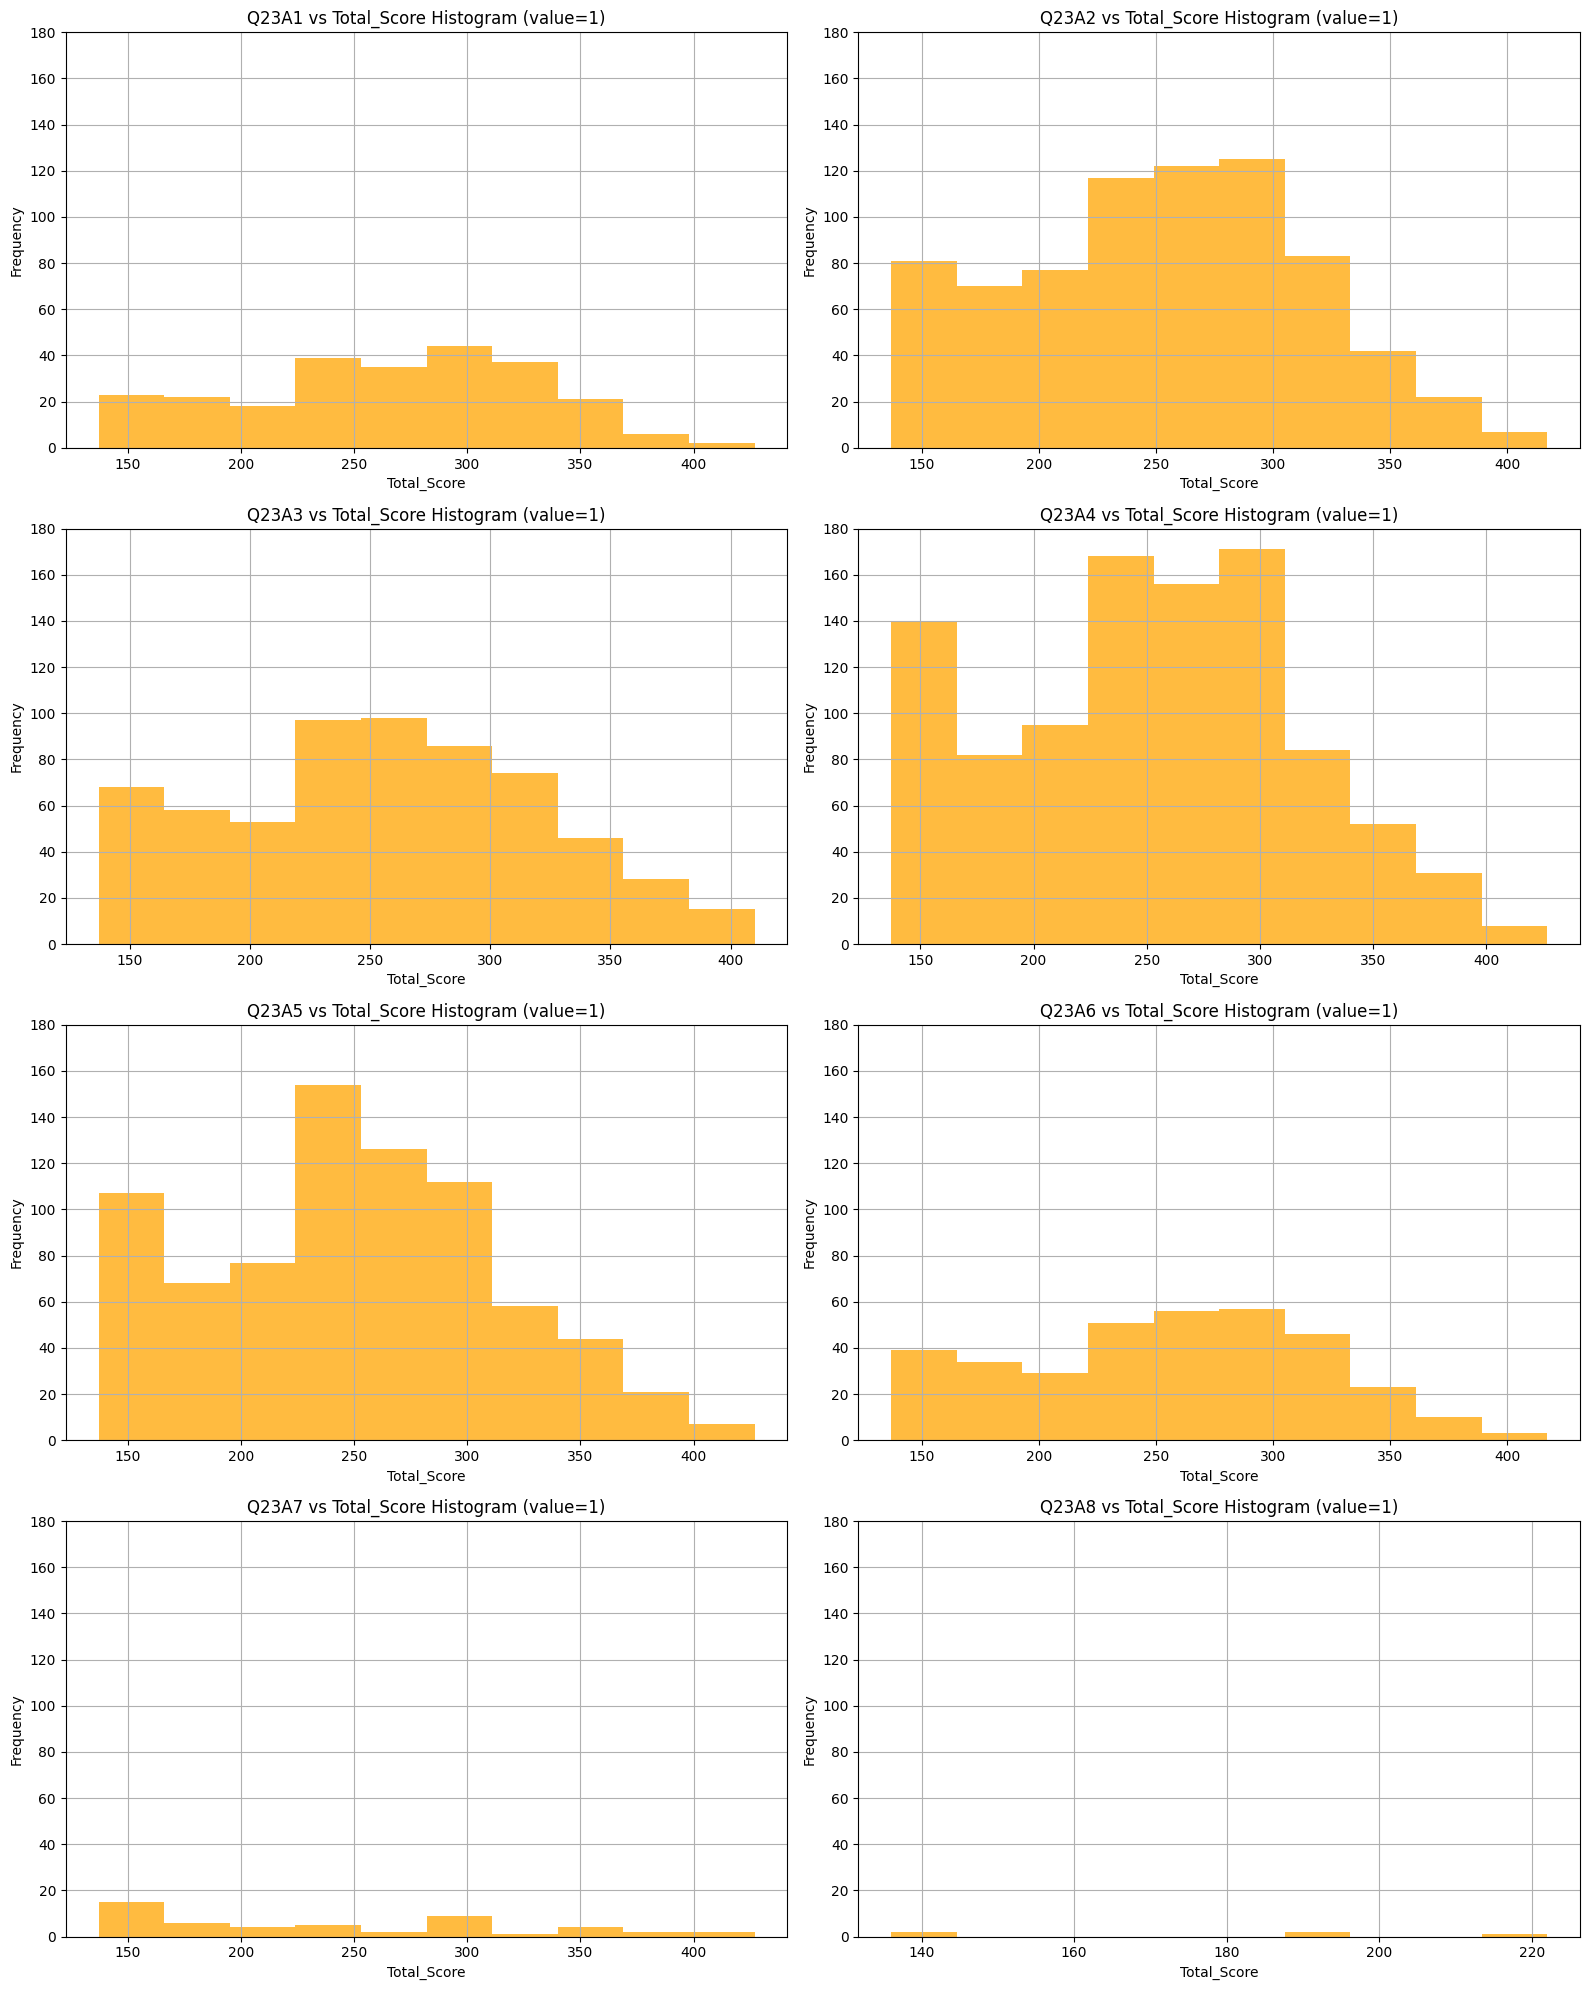

In [ ]:
# 각 칼럼에 대해 Total_Score의 분포를 시각화
fig, axs = plt.subplots(4, 2, figsize=(16, 20))

# 서브플롯 배열을 평탄화
axs = axs.flatten()

# 각 칼럼에 대해 Total_Score 히스토그램 그리기 (값이 1인 경우만)
for i, column in enumerate(combined_data.columns[:-1]):  # 마지막 'Total_Score' 컬럼 제외
    filtered_data = combined_data[combined_data[column] == 1]
    axs[i].hist(filtered_data['Total_Score'], bins=10, alpha=0.75, color='orange')
    axs[i].set_title(f'{column} vs Total_Score Histogram (value=1)')
    axs[i].set_xlabel('Total_Score')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)
    axs[i].set_ylim(0, 180)  # 모든 히스토그램의 y축 범위를 동일하게 설정

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 분석결과
각 응답별 응답자 디지털 리터러시 점수의 분포를 시각화 함

A5, A2의 히스토그램에서 비교적 낮은 점수를 가진 사람들의 응답 비율이 많음

# 데이터 모델링
'Q7A1': 최근 한달 일수(노트북 / 데스크탑)

노트북/데스크탑을 사용하지 않는 사람들과 디지털 리터러시 점수 예측


In [ ]:
total_score = processing_data['Total_Score']

total_score

0       269
1       347
2       296
3       358
4       364
       ... 
2295    158
2296    175
2297    179
2298    168
2299    155
Name: Total_Score, Length: 2300, dtype: int64

In [ ]:
com_score = pd.concat([total_score, day_com], axis=1)

com_score

,Total_Score,Q7A1
0,269,0
1,347,0
2,296,1
3,358,15
4,364,20
...,...,...
2295,158,0
2296,175,0
2297,179,0
2298,168,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(df_x_data, df_y_data, test_size=0.2, random_state=42)

X_train

360     0
2224    0
351     0
2147    0
1962    0
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: Q7A1, Length: 1840, dtype: int64

In [ ]:
# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
y_train = np.array(y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 모델의 회귀 계수 출력
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Mean Squared Error: 3179.7492847064277
R^2 Score: 0.2971925301234526
Intercept: [256.56841841]
Coefficient: [[4.69714141]]


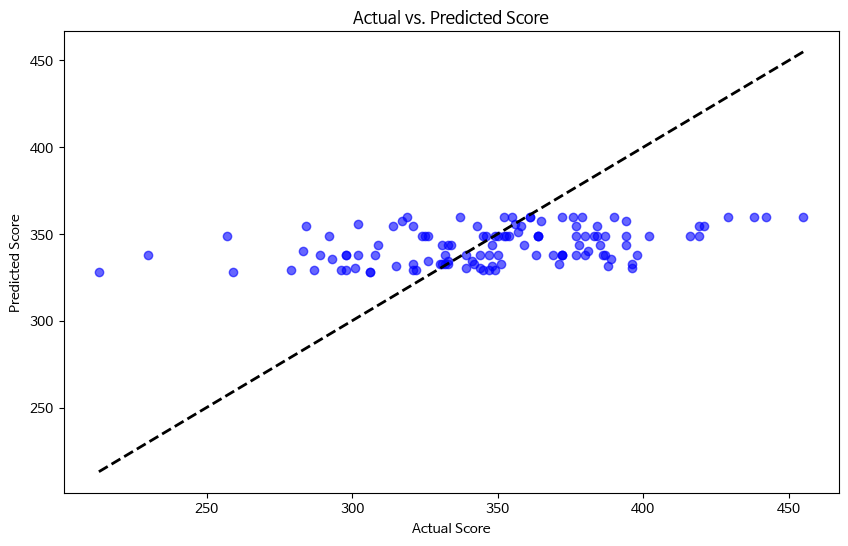

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 값과 예측 값의 비교 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Score')
plt.show()



모델이 좋은 성능을 보이지 못함

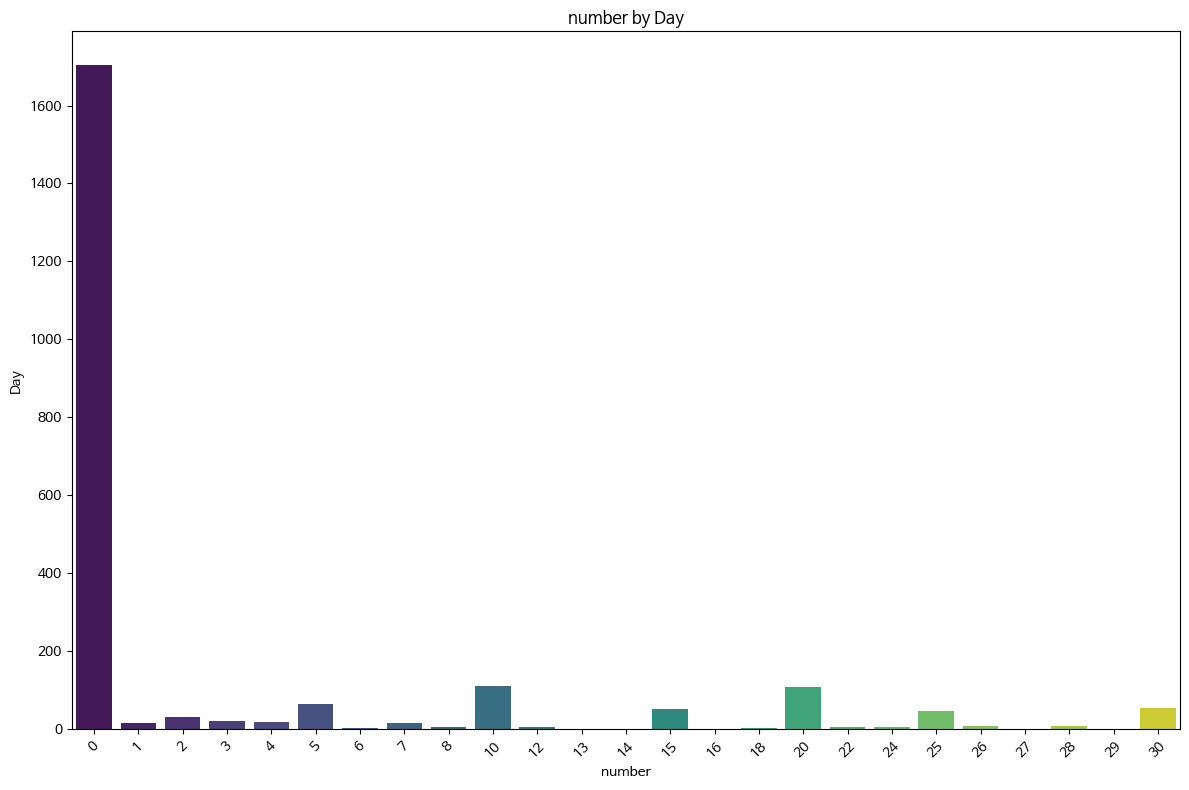

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.barplot(x='Q7A1', y=0, data=grouped_df2, palette='viridis')
plt.title('number by Day')
plt.xlabel('number')
plt.ylabel('Day')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 분석 결과

한달동안 아예 노트북과 데스크탑을 이용하지 않은 사람들이 많음

# 데이터 모델링
노트북/데스크탑을 사용하지 않는 사람들과 디지털 리터러시 점수 예측 2
- 0일차 데이터 제거

In [ ]:
com_score2 = com_score.loc[com_score['Q7A1'] != 0]

com_score2

,Total_Score,Q7A1
2,296,1
3,358,15
4,364,20
5,381,20
6,341,25
...,...,...
1075,364,20
1076,365,28
1100,366,3
1101,346,20


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(df_x_data, df_y_data, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
y_train = np.array(y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 모델의 회귀 계수 출력
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Mean Squared Error: 1542.4432517183793
R^2 Score: 0.12412613717702203
Intercept: [326.95533691]
Coefficient: [[1.09808032]]


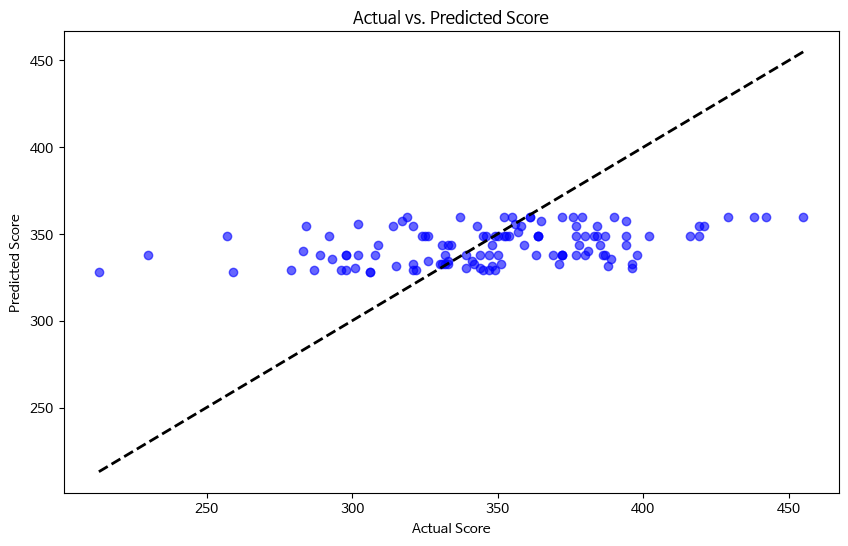

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 값과 예측 값의 비교 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Score')
plt.show()



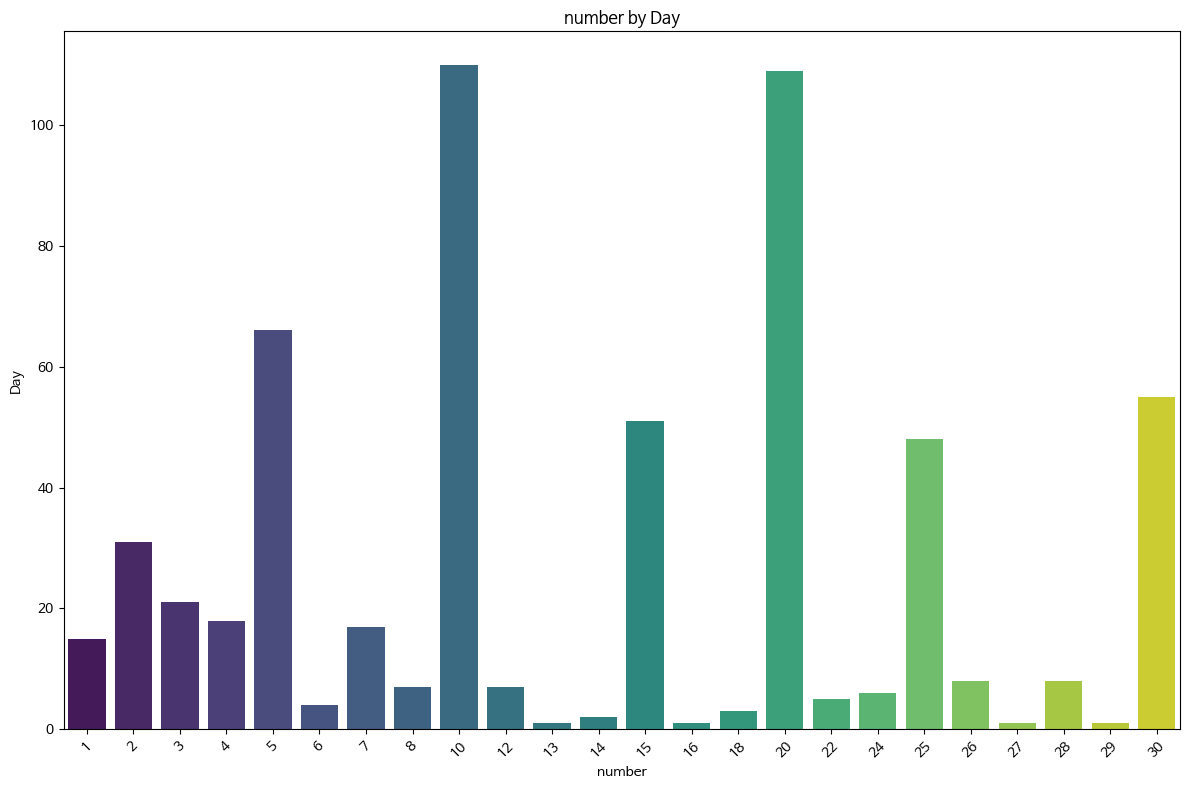

In [ ]:
grouped_df3 = com_score2.groupby('Q7A1').size().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Q7A1', y=0, data=grouped_df3, palette='viridis')
plt.title('number by Day')
plt.xlabel('number')
plt.ylabel('Day')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## 분석 결과

아예 사용하지 않은 사람들을 제외했을때 10일 이상 사용하는 사람들이 많은 것을 확인

# 데이터 모델링

'ADQ9' :  가구 월평균 소득

1 : 100만원 미만
2 : 200만원 미만
3 : 300만원 미만
4 : 400만원 미만
5 : 500만원 미만
6 : 600만원 미만
7 : 700만원 미만
8 : 800만원 미만
9 : 900만원 미만
10 : 1000만원 미만
11 : 1000만원 이상

디지털 리터러시 점수별 소득 수준 예측

DecisionTree 이용

In [ ]:
from sklearn.tree import DecisionTreeClassifier

df_x_data = processing_data['Total_Score']

df_y_data = raw_data['ADQ9']


# 데이터셋의 20%를 테스트 데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(
    df_x_data,
    df_y_data,
    test_size=0.2,
    random_state=11,
    stratify=df_y_data
)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
y_train = np.array(y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))




예측 정확도: 0.1935


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
df_x_data = np.array(df_x_data).reshape(-1, 1)
df_y_data = np.array(df_y_data).reshape(-1, 1)
# 교차 검증 수행
scores = cross_val_score(dt_clf, df_x_data, df_y_data, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Accuracy Scores: [0.2326087  0.21086957 0.24130435 0.22173913 0.22826087]
Mean Accuracy: 0.22695652173913042
Standard Deviation: 0.010252022715262253


In [ ]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df_x_data = processing_data[['Total_Score']]

df_y_data = raw_data['ADQ9']

# 결정 트리 시각화
dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=df_x_data.columns,
                           class_names=dt_clf.classes_.astype(str),  # 클래스 이름 지정
                           filled=True, rounded=True,
                           special_characters=True)

# 그래프 생성 및 이미지 표시
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 데이터 모델링

'ADQ9' :  가구 월평균 소득

1 : 100만원 미만
2 : 200만원 미만
3 : 300만원 미만
4 : 400만원 미만
5 : 500만원 미만
6 : 600만원 미만
7 : 700만원 미만
8 : 800만원 미만
9 : 900만원 미만
10 : 1000만원 미만
11 : 1000만원 이상

디지털 리터러시 점수별 소득 수준 예측 2
- 소득 수준 구분 생성

1~4 : low(소득수준 낮음)

5~8 : mid(소득수준 중간)

8~11 : high(소득수준 높음)

DecisionTree 이용

In [ ]:
# 사용자 정의 함수
def categorize_score(score):
    if 1 <= score <= 4:
        return 'low'
    elif 5 <= score <= 8:
        return 'middle'
    elif 9 <= score <= 11:
        return 'high'
    else:
        return 'NaN'  # 범위 밖의 값에 대해서는 NaN을 반환합니다.

# 함수 적용
y = raw_data['ADQ9'].apply(categorize_score)

print(y)

0       low
1       low
2       low
3       low
4       low
       ... 
2295    low
2296    low
2297    low
2298    low
2299    low
Name: ADQ9, Length: 2300, dtype: object


In [ ]:
from sklearn.tree import DecisionTreeClassifier



# 데이터셋의 20%를 테스트 데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=11,
    stratify=df_y_data
)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
y_train = np.array(y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))




예측 정확도: 0.6652


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
df_x_data = np.array(x).reshape(-1, 1)
df_y_data = np.array(y).reshape(-1, 1)
# 교차 검증 수행
scores = cross_val_score(dt_clf, df_x_data, df_y_data, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Accuracy Scores: [0.65434783 0.63695652 0.68043478 0.66956522 0.66521739]
Mean Accuracy: 0.6613043478260869
Standard Deviation: 0.014769815436054805


In [ ]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df_x_data = processing_data[['Total_Score']]

df_y_data = y

# 결정 트리 시각화
dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=df_x_data.columns,
                           class_names=dt_clf.classes_.astype(str),  # 클래스 이름 지정
                           filled=True, rounded=True,
                           special_characters=True)

# 그래프 생성 및 이미지 표시
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

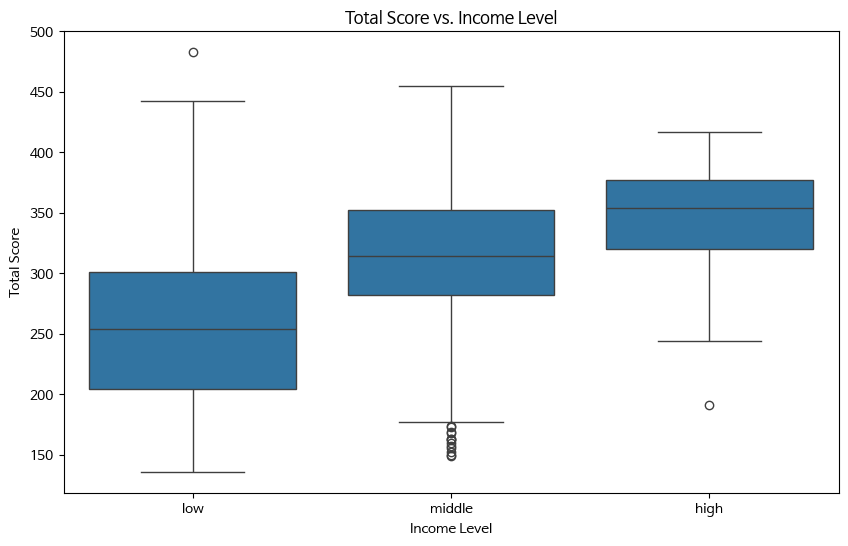

In [ ]:
# 데이터 통합
df = pd.concat([df_x_data, df_y_data], axis=1)

# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='ADQ9', y='Total_Score', data=df)
plt.title('Total Score vs. Income Level')
plt.xlabel('Income Level')
plt.ylabel('Total Score')
plt.show()

# 데이터 분석
디지털 리터러시 점수에 대한 질문별 상관관계 분석

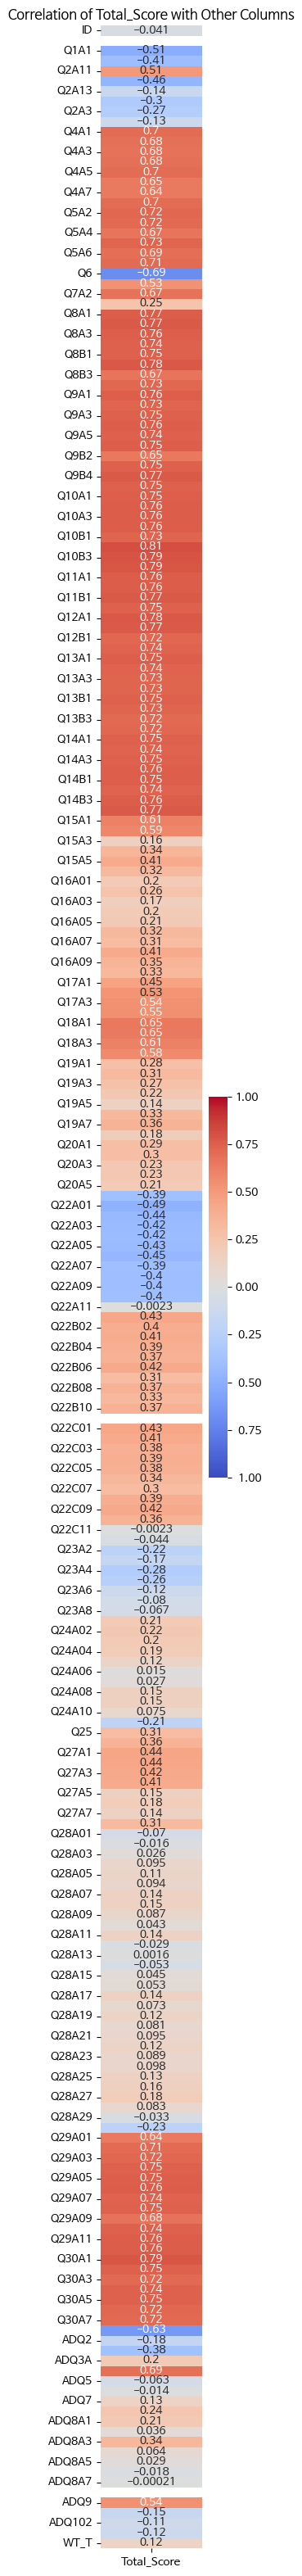

In [ ]:
target_column = 'Total_Score'

# 상관관계 계산
correlation_matrix = raw_data.corr()

target_correlation = correlation_matrix[[target_column]].drop(index=target_column)

# 히트맵 그리기
plt.figure(figsize=(2, 40))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation of {target_column} with Other Columns')
plt.show()

# 데이터 모델링
디지털 리터러시 점수별 교육 수준 예측
- 선형회귀 이용

'ADQ4' : 최종학력

1 : 초등졸 이하
2 : 중졸(고등학교 중퇴 포함)
3 : 고졸(대학교 중퇴 포함)
4 : 대졸(전문대 포함) 이상
9 : 무응답

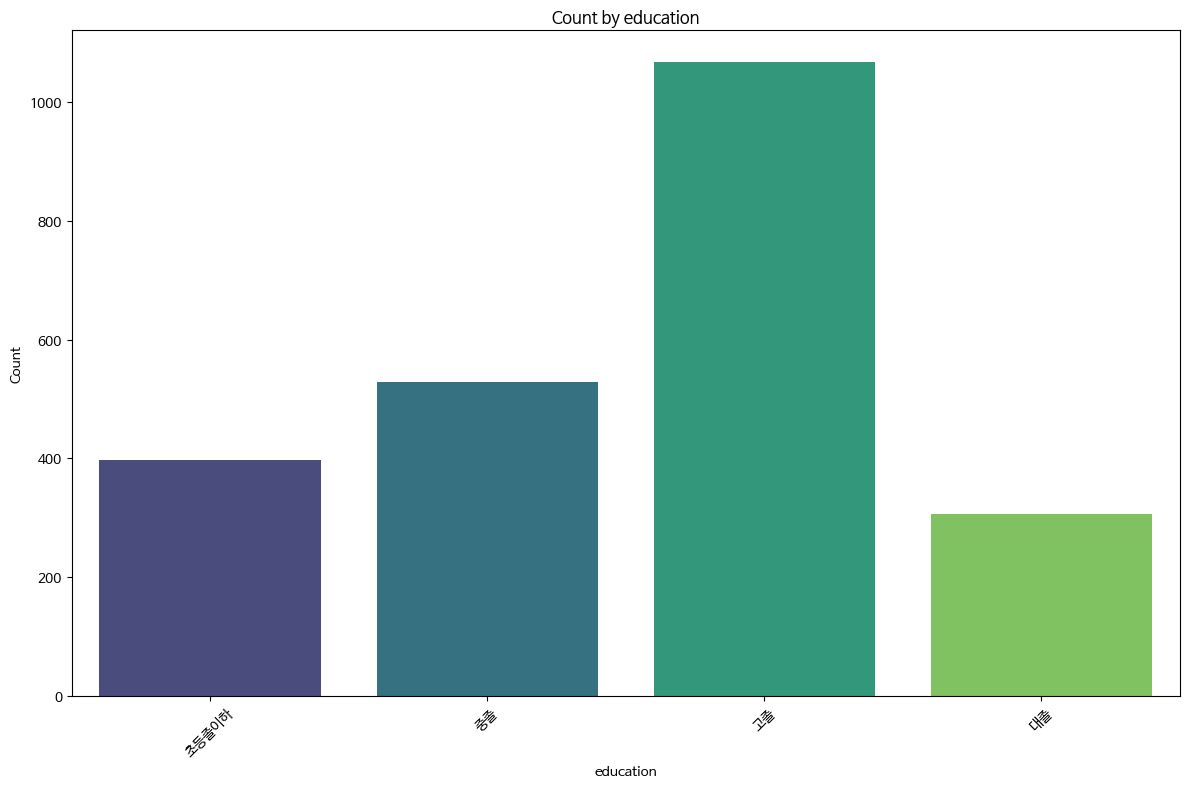

In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(x='ADQ4', y='Count', data=grouped_df, palette='viridis')
plt.title('Count by education')
plt.xlabel('education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 분석 결과
고졸 출신의 응답자 수 많음

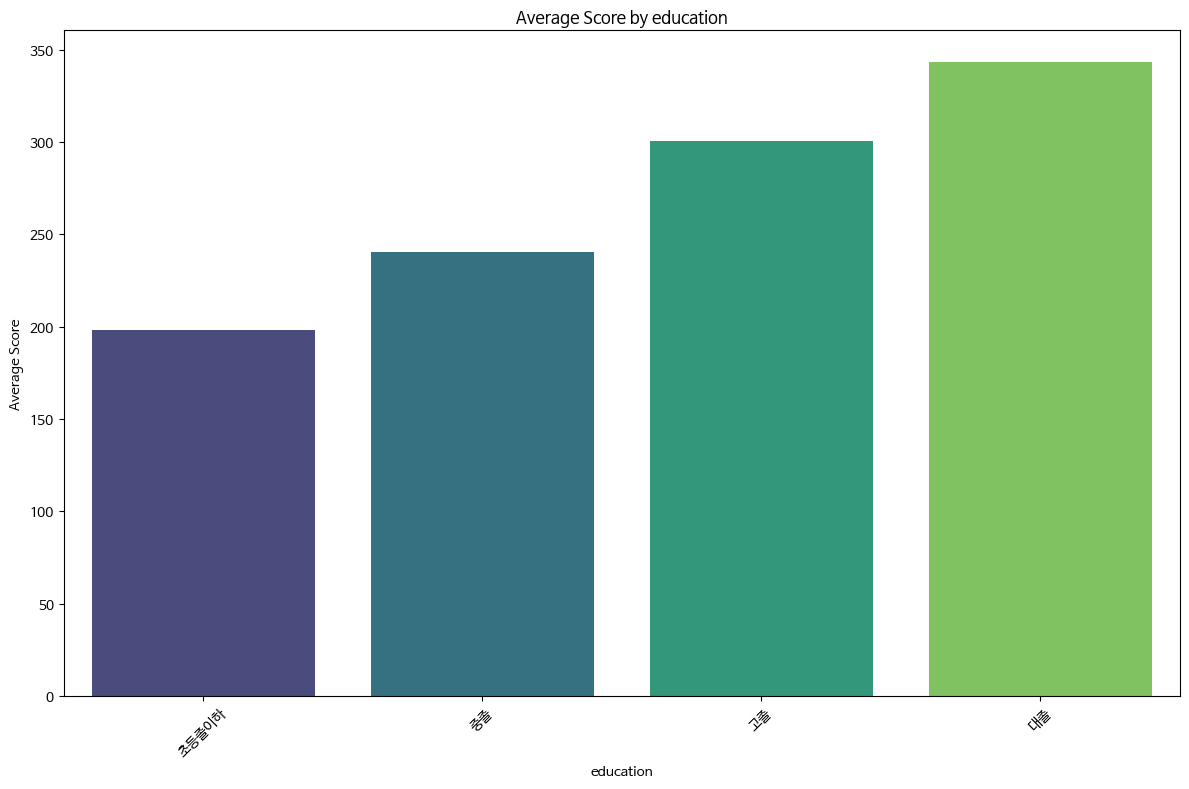

In [ ]:
# 파일을 불러와서 데이터프레임으로 변환
edu_mapping = {
    1: '초등졸이하', 2: '중졸', 3: '고졸', 4: '대졸', 9: '무응답'
}

# ADQ3 값을 지역명으로 변환
grouped_df['ADQ4'] = grouped_df['ADQ4'].map(edu_mapping)


grouped_df['Average_Score'] = grouped_df['Total_Sum'] / grouped_df['Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='ADQ4', y='Average_Score', data=grouped_df, palette='viridis')
plt.title('Average Score by education')
plt.xlabel('education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 분석 결과
대졸 출신의 응답자의 평균 디지털 리터러시 점수가 높음

In [ ]:
total_score = processing_data['Total_Score']
edu = raw_data['ADQ4']

# 파일을 불러와서 데이터프레임으로 변환
edu_mapping = {
    1: '초등졸이하', 2: '중졸', 3: '고졸', 4: '대졸', 9: '무응답'
}

# ADQ3 값을 지역명으로 변환
raw_data['ADQ4'] = raw_data['ADQ4'].map(edu_mapping)


# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(total_score, edu, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
y_train = np.array(y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 모델의 회귀 계수 출력
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Mean Squared Error: 0.4199618101341829
R^2 Score: 0.4817705158483222
Intercept: [0.00779158]
Coefficient: [[0.00929292]]


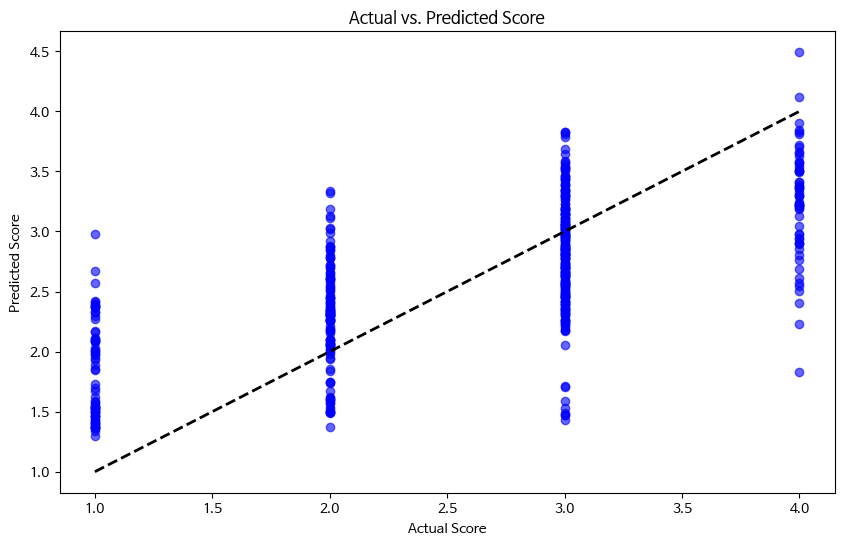

In [ ]:
# 실제 값과 예측 값의 비교 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Score')
plt.show()

## 분석결과
예측 값이 대체로 실제 값의 범위 안에 있지만, 분산이 커서 모델의 예측이 정확하지 않음

# 데이터 모델링
디지털 리터러시 점수별 교육 수준 예측
- 결정 트리 이용

'ADQ4' : 최종학력

1 : 초등졸 이하
2 : 중졸(고등학교 중퇴 포함)
3 : 고졸(대학교 중퇴 포함)
4 : 대졸(전문대 포함) 이상
9 : 무응답

In [ ]:
df_x_data = total_score

df_y_data = edu


# 데이터셋의 20%를 테스트 데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(
    df_x_data,
    df_y_data,
    test_size=0.2,
    random_state=11,
    stratify=df_y_data
)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
y_train = np.array(y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


예측 정확도: 0.5348


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
df_x_data = np.array(df_x_data).reshape(-1, 1)
df_y_data = np.array(df_y_data).reshape(-1, 1)
# 교차 검증 수행
scores = cross_val_score(dt_clf, df_x_data, df_y_data, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Accuracy Scores: [0.54347826 0.52391304 0.55       0.56521739 0.52826087]
Mean Accuracy: 0.5421739130434782
Standard Deviation: 0.014973195963237018


In [ ]:
df_x_data = processing_data[['Total_Score']]

df_y_data = edu

# 결정 트리 시각화
dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=df_x_data.columns,
                           class_names=dt_clf.classes_.astype(str),  # 클래스 이름 지정
                           filled=True, rounded=True,
                           special_characters=True)

# 그래프 생성 및 이미지 표시
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

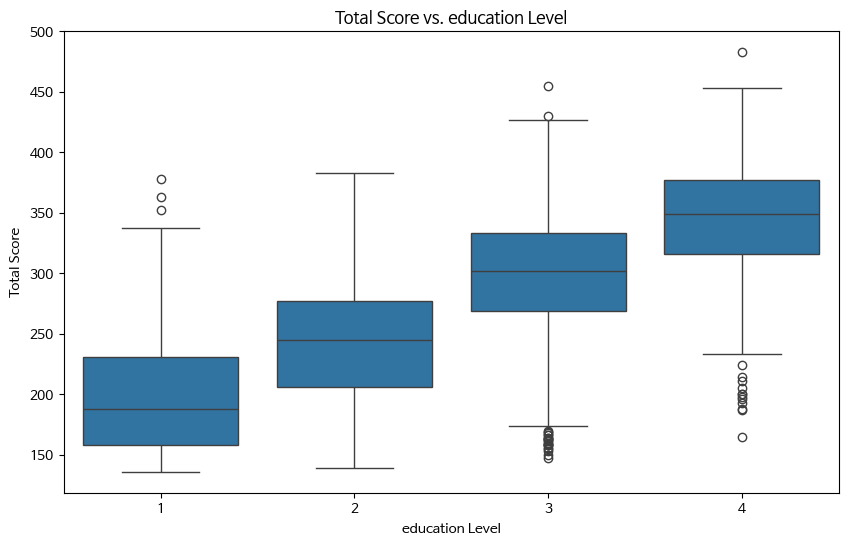

In [ ]:
# 데이터 통합
df = pd.concat([df_x_data, df_y_data], axis=1)

# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='ADQ4', y='Total_Score', data=df)
plt.title('Total Score vs. education Level')
plt.xlabel('education Level')
plt.ylabel('Total Score')
plt.show()

## 분석 결과
대졸의 디지털 리터러시 점수가 비교적 높음